# Fron Dynamic Programming  To ML

In [13]:
origin_price = [1,5,8,9,10,17,17,20,24,30,33] # 长度1-11的价格

from collections import defaultdict
prices = defaultdict(int)

for i in range(1,len(origin_price)+1):
    prices[i] = origin_price[i-1]
    
# prices = {i+1: p for i,p in enumerate(origin_price)}

In [14]:
prices

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 33})

In [15]:
solution = {}

def r(n): # the revenue of length n
    candidates = []
    for i in range(1,n):
        candidates.append((r(i) + r(n-i),i))
    candidates.append((prices[n],0))
    
    max_price,split_point = max(candidates,key = lambda x:x[0])
    
    global solution
    solution[n] = (split_point,n-split_point)
    
    return max_price

In [19]:
%%time
r(8)

CPU times: user 2.67 ms, sys: 13 µs, total: 2.69 ms
Wall time: 2.7 ms


22

In [20]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6)}

## decorator

In [27]:
from datetime import datetime
import time

In [30]:
def func1(n):
    begin = datetime.now()
    time.sleep(0.1)
    # print('used time = {}'.format(datetime.now()-begin))
    return n

In [31]:
func1(0)

used time = 0:00:00.102765


0

In [32]:
def get_func_time(func):
    
    def _wrap(n):
        begin = datetime.now()
        result = func(n)
        print('used time = {}'.format(datetime.now()-begin))
        
        return result
    return _wrap

In [35]:
func1_with_time = get_func_time(func1)
'''
@another_func
def some_func:
    pass

==> some_func = anthoer_func(some_func)
'''

func1_with_time(9)

used time = 0:00:00.100086
used time = 0:00:00.100235


9

In [36]:
@get_func_time
def get(n):
    print(n)

In [37]:
get(8)

8
used time = 0:00:00.000172


In [38]:
def memo(func):
    
    cache = {}
    def _wrap(n):
        if n in cache: result = cache[n]
        else:
            result = func(n)
            cache[n] = result
        return result
    
    return _wrap

In [41]:
solution = {}
@memo
def r(n): # the revenue of length n
#     candidates = []
#     for i in range(1,n):
#         candidates.append((r(i) + r(n-i),i))
#     candidates.append((prices[n],0))
    
#     max_price,split_point = max(candidates,key = lambda x:x[0])
    max_price,split_point = max([(prices[n],0)] + [(r(i)+r(n-i),i) for i in range(1,n)],key = lambda x:x[0])
    
    global solution
    solution[n] = (split_point,n-split_point)
    
    return max_price

In [42]:
%%time
r(8)

CPU times: user 50 µs, sys: 0 ns, total: 50 µs
Wall time: 52.9 µs


22

## Dynamic Programming

In [44]:
%%time
r(155)

CPU times: user 7.51 ms, sys: 266 µs, total: 7.78 ms
Wall time: 7.85 ms


465

In [45]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (0, 11),
 12: (2, 10),
 13: (2, 11),
 14: (3, 11),
 15: (2, 13),
 16: (6, 10),
 17: (6, 11),
 18: (2, 16),
 19: (2, 17),
 20: (10, 10),
 21: (10, 11),
 22: (11, 11),
 23: (2, 21),
 24: (2, 22),
 25: (3, 22),
 26: (6, 20),
 27: (6, 21),
 28: (6, 22),
 29: (2, 27),
 30: (10, 20),
 31: (10, 21),
 32: (10, 22),
 33: (11, 22),
 34: (2, 32),
 35: (2, 33),
 36: (3, 33),
 37: (6, 31),
 38: (6, 32),
 39: (6, 33),
 40: (10, 30),
 41: (10, 31),
 42: (10, 32),
 43: (10, 33),
 44: (11, 33),
 45: (2, 43),
 46: (2, 44),
 47: (3, 44),
 48: (6, 42),
 49: (6, 43),
 50: (10, 40),
 51: (10, 41),
 52: (10, 42),
 53: (10, 43),
 54: (10, 44),
 55: (11, 44),
 56: (2, 54),
 57: (2, 55),
 58: (3, 55),
 59: (6, 53),
 60: (10, 50),
 61: (10, 51),
 62: (10, 52),
 63: (10, 53),
 64: (10, 54),
 65: (10, 55),
 66: (11, 55),
 67: (2, 65),
 68: (2, 66),
 69: (3, 66),
 70: (10, 60),
 71: (10, 61

In [43]:
def not_cut(n): return n==0
def parse_solution(target_length,revenue_solution):
    left,right = revenue_solution[target_length]
    
    if not_cut(left): return [right]
    
    return parse_solution(left,revenue_solution)+parse_solution(right,revenue_solution)

In [49]:
parse_solution(37,solution)

[6, 10, 10, 11]

## 动态规划
解决具备一定限制条件的最优问题
- 问题可分成若干子问题
- 子问题之间存在overlapping
- 对重合子问题进行cache
- 根据cache数据加速解决问题
- 还要构建parse_solution函数解析最终结果

e.g. 编辑距离 edit distance ; 相似基因判断 ； 路径规划 


# 非监督式学习 - 聚类

## Finding centers

In [3]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

### Feature Extractor

In [51]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import re

### <font color=#FF0000>  正则表达式 re </font>  

In [24]:
??re

Type:        module
String form: <module 're' from '/opt/anaconda3/lib/python3.7/re.py'>
File:        /opt/anaconda3/lib/python3.7/re.py
Source:     
#
# Secret Labs' Regular Expression Engine
#
# re-compatible interface for the sre matching engine
#
# Copyright (c) 1998-2001 by Secret Labs AB.  All rights reserved.
#
# This version of the SRE library can be redistributed under CNRI's
# Python 1.6 license.  For any other use, please contact Secret Labs
# AB (info@pythonware.com).
#
# Portions of this engine have been developed in cooperation with
# CNRI.  Hewlett-Packard provided funding for 1.6 integration and
# other compatibility work.
#

r"""Support for regular expressions (RE).

This module provides regular expression matching operations similar to
those found in Perl.  It supports both 8-bit and Unicode strings; both
the pattern and the strings being processed can contain null bytes and
characters outside the US ASCII range.

Regular expressions can contain both special and ordin

In [25]:
pattern = re.compile(r'name:\'(\w+)\',\s+geoCoord:\[(\d+.\d+),\s+(\d+.\d+)\]')
city_info = pattern.findall(coordination_source)

In [26]:
city_locations = {}

# for line in coordination_source.split('\n'):
#     city_info = pattern.findall(line)
#     if not city_info:continue
        
#     city,long,lat = city_info[0]
#     long, lat = float(long), float(lat)
#     city_locations[city] = (long, lat)
    
for city_name,long,lat in city_info:
    city_locations[city_name] = (float(long),float(lat))

city_locations

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [29]:
# 球面地理距离
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lon1, lat1 = origin
    lon2, lat2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

### <font color=#FF0000> 距离 </font>  
- 球面地理距离
- 余弦距离
$$ cos(\theta) = \frac{\vec{a}\cdot \vec{b}}{{|a|\cdot{|b|}}} = \frac{{x_1}\cdot{x_2}}{{\sqrt{{x_1}^2+{x_2}^2}}\cdot{\sqrt{{y_1}^2+{y_2}^2}}} $$

- 欧几里得距离
$$ \sqrt{ {({x_1}-{x_2})}^2 + (y_1-y_2)^2} $$
- 曼哈顿距离
$$ |x_1-x_2|+|y_1-y_2| $$



In [28]:
%matplotlib inline

In [33]:
??nx.draw_networkx

Signature: nx.draw_networkx(G, pos=None, arrows=True, with_labels=True, **kwds)
Source:   
def draw_networkx(G, pos=None, arrows=True, with_labels=True, **kwds):
    """Draw the graph G using Matplotlib.

    Draw the graph with Matplotlib with options for node positions,
    labeling, titles, and many other drawing features.
    See draw() for simple drawing without labels or axes.

    Parameters
    ----------
    G : graph
       A networkx graph

    pos : dictionary, optional
       A dictionary with nodes as keys and positions as values.
       If not specified a spring layout positioning will be computed.
       See :py:mod:`networkx.drawing.layout` for functions that
       compute node positions.

    arrows : bool, optional (default=True)
       For directed graphs, if True draw arrowheads.
       Note: Arrows will be the same color as edges.

    arrowstyle : str, optional (default='-|>')
        For directed graphs, choose the style of the arrowsheads.
        See :py:clas

In [31]:
city_locations.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '海口', '沈阳', '长春', '哈尔滨', '太原', '西安', '台湾', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '西藏', '银川', '乌鲁木齐', '香港', '澳门'])

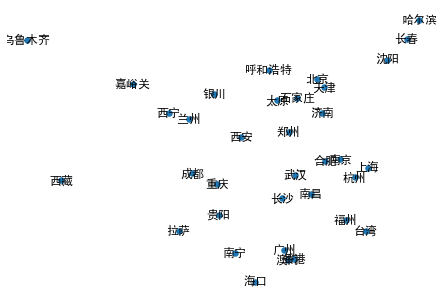

In [40]:
# 打印地图

# 此代码解决不显示汉字的问题
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
# from pylab import mpl
# mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
# mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

city_graph = nx.Graph()
city_graph.add_nodes_from(city_locations.keys())
nx.draw(city_graph, city_locations, with_labels = True, node_size = 30)

In [44]:
all_x,all_y = [],[]
for x,y in city_locations.values():
    all_x.append(x)
    all_y.append(y)

In [123]:
locations = np.array(list(city_locations.values()))
locations

array([[103.73,  36.03],
       [ 98.17,  39.47],
       [101.74,  36.56],
       [104.06,  30.67],
       [114.48,  38.03],
       [102.73,  25.04],
       [106.71,  26.57],
       [114.31,  30.52],
       [113.65,  34.76],
       [117.  ,  36.65],
       [118.78,  32.04],
       [117.27,  31.86],
       [120.19,  30.26],
       [115.89,  28.68],
       [119.3 ,  26.08],
       [113.23,  23.16],
       [113.  ,  28.21],
       [110.35,  20.02],
       [123.38,  41.8 ],
       [125.35,  43.88],
       [126.63,  45.75],
       [112.53,  37.87],
       [108.95,  34.27],
       [121.3 ,  25.03],
       [116.46,  39.92],
       [121.48,  31.22],
       [106.54,  29.59],
       [117.2 ,  39.13],
       [111.65,  40.82],
       [108.33,  22.84],
       [ 91.11,  29.97],
       [106.27,  38.47],
       [ 87.68,  43.77],
       [114.17,  22.28],
       [113.54,  22.19]])

### Find suitable centers -- KMeans

In [56]:
import random

In [127]:
import collections

# 随机初始化K个中心
def get_random_center(all_x,all_y):
    return (random.uniform(min(all_x),max(all_x)),random.uniform(min(all_y),max(all_y)))

# K = 5
# center = {'{}'.format(i+1):get_random_center(all_x,all_y) for i in range(K)}
# print(center,'\n')

# closet_points = collections.defaultdict(list)
# threshold = 3

# changed = True
# while changed:
#     for x,y in zip(all_x,all_y):
#         closet_c,closet_dis = min( [(k,geo_distance((x,y),center[k])) for k in center],key = lambda t:t[1])
        
#         closet_points[closet_c].append([x,y])
        
#         # print('for ({},{}) : closet_c = {}'.format(x,y,closet_c))
#     changed = False
    
#     for c in closet_points:
#         former_center = center[c]
#         neighbors = closet_points[c] # 离c最近的几个城市
        
#         neighbors_center = np.mean(neighbors,axis = 0) # 离c最近的几个城市的中心点
        
#         if geo_distance(neighbors_center,former_center) > threshold:
#             # 如果离c最近的几个城市的中心点 和 原来中心点c 之间的距离 > 阈值，那更新中心点c
#             center[c] = neighbors_center
#             changed = True
#             print('update {} center'.format(c))

def iter_once(center,closet_points,threshold = 3):
    have_changed = False
    
    for c in closet_points:
        former_center = center[c]
        neighbors = closet_points[c]
        
        neighbors_center = np.mean(neighbors, axis=0)
        
        if geo_distance(neighbors_center,former_center) > threshold:
            # 如果离c最近的几个城市的中心点 和 原来中心点c 之间的距离 > 阈值，那更新中心点c
            center[c] = neighbors_center
            have_changed = True 
    return center,have_changed

def kmeans(all_locations,K = 5,threshold = 3):
    all_x,all_y = all_locations[:,0],all_locations[:,1]
    
    # 随机初始化
    center = {'{}'.format(i+1):get_random_center(all_x,all_y) for i in range(K)}
    
    changed = True
    
    while changed:
        closet_points = collections.defaultdict(list)
        for x,y in zip(all_x,all_y):
            closet_c,closet_dis = min( [(k,geo_distance((x,y),center[k])) for k in center],key = lambda t:t[1])

            closet_points[closet_c].append([x,y])
    
        center,changed = iter_once(center,closet_points)
    return center
    

In [128]:
kmeans(locations)

{'1': array([105.1725,  36.3325]),
 '2': array([117.833,  39.861]),
 '3': array([116.87166667,  27.6275    ]),
 '4': array([92.32      , 37.73666667]),
 '5': array([106.45333333,  25.78833333])}

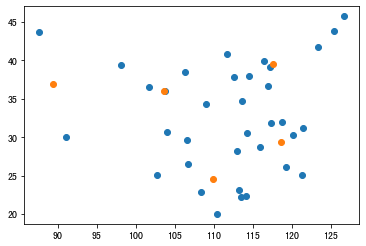

In [104]:
# plt.scatter(all_x,all_y)
plt.scatter(*[all_x,all_y])

# plt.scatter([x for x,y in center.values()] , [y for x,y in center.values()])
plt.scatter(*zip(*center.values()))

In [113]:
stations = {
    '能源站-{}'.format(i): position for i, position in center.items()
}
stations

{'能源站-1': array([118.65206522,  29.40413043]),
 '能源站-2': array([103.645    ,  35.9922973]),
 '能源站-3': array([117.61061644,  39.60253425]),
 '能源站-4': array([109.84648438,  24.51523438]),
 '能源站-5': array([89.395, 36.87 ])}

In [138]:
def draw_cities(city,color = None):
    city_graph = nx.Graph()
    city_graph.add_nodes_from(list(city.keys()))
    nx.draw(city_graph,city,with_labels = True,node_size = 40,node_color = color)

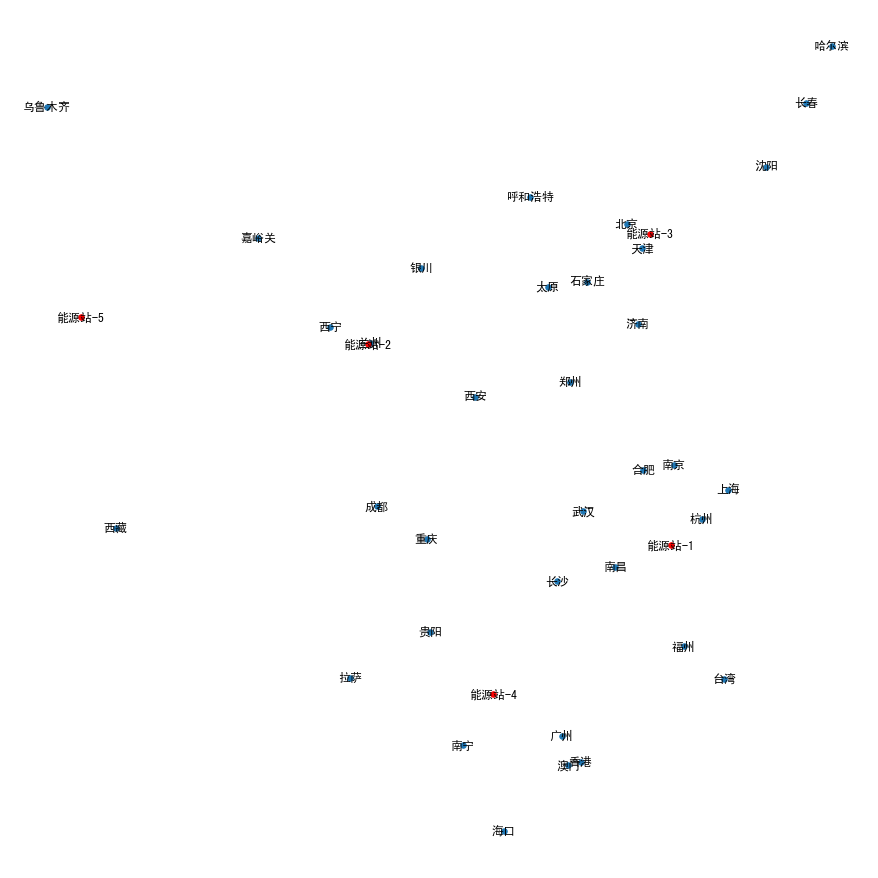

In [120]:
plt.figure(1,figsize=(12,12))
draw_cities(city_locations)
draw_cities(stations,color = 'red')

## sklearn实现Kmeans
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [139]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5,random_state = 0).fit(locations)
sk_stations = kmeans.cluster_centers_

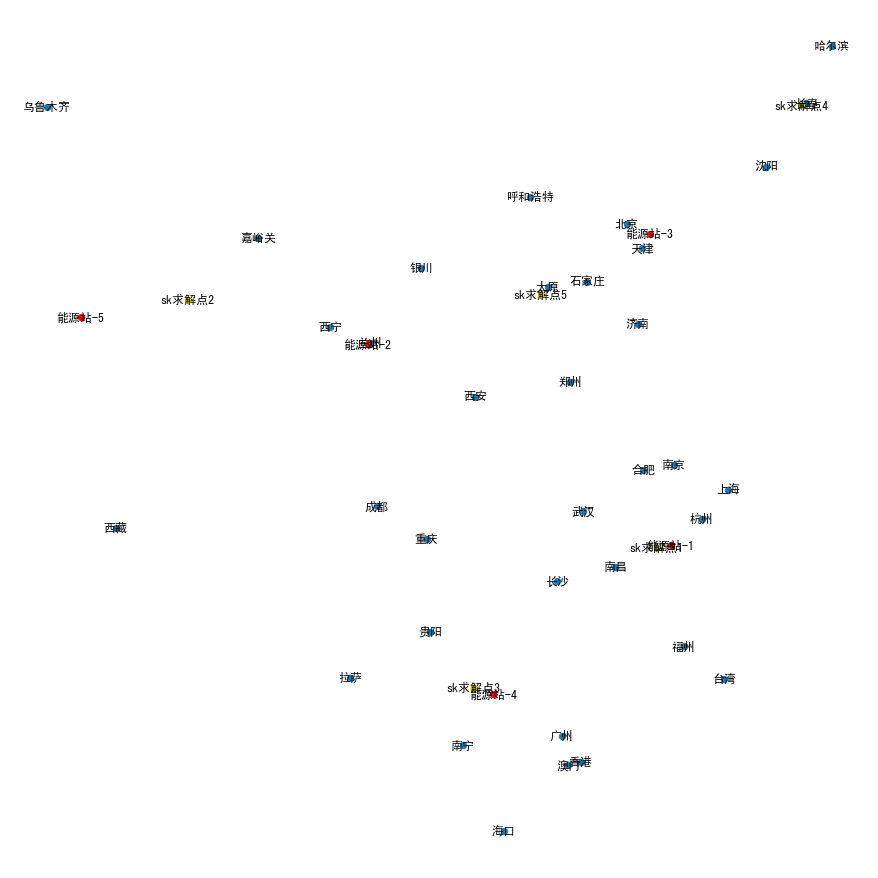

In [140]:
plt.figure(1,figsize = (12,12))
draw_cities(city_locations)
draw_cities(stations,color = 'red')
draw_cities( {'sk求解点{}'.format(int(i)+1) : p for i,p in enumerate(sk_stations)} , color = 'yellow' )

# <font color=#FF0000> 知识点 </font>  
- 装饰器
- 动态规划
- 距离
- 正则表达式
- 聚类，KMeans
- 机器学习流程（见PPT）